# Well and Grace Drought Analysis Code
Written by Danielle Tadych

 The purpose of this script is to analyze our master water level database and GRACE data for various types of drought. 

## Loading packages and files

In [16]:
import Custom_functions

# Data paths
datapath = '../Data/Input_files/'
outputpath = '../Data/Output_files/'
shapepath = '../Data/Shapefiles/'

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_Region  11 non-null     object  
 1   GEOREGI_NU  11 non-null     int64   
 2   Water_CAT   11 non-null     object  
 3   Loc         11 non-null     object  
 4   Regulation  11 non-null     object  
 5   geometry    11 non-null     geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 656.0+ bytes
../Data/Input_files/Wells55_GWSI_WLTS_DB_annual.csv


,PDSI,PHDI
In_year,,
1975,-1.415833,-1.415833
1976,-0.960000,-0.881667
1977,-1.915000,-1.915000
1978,2.998333,2.831667
1979,5.378333,5.378333
1980,1.709167,3.659167
1981,-2.196667,-2.196667
1982,0.982500,0.443333
1983,4.949167,4.949167


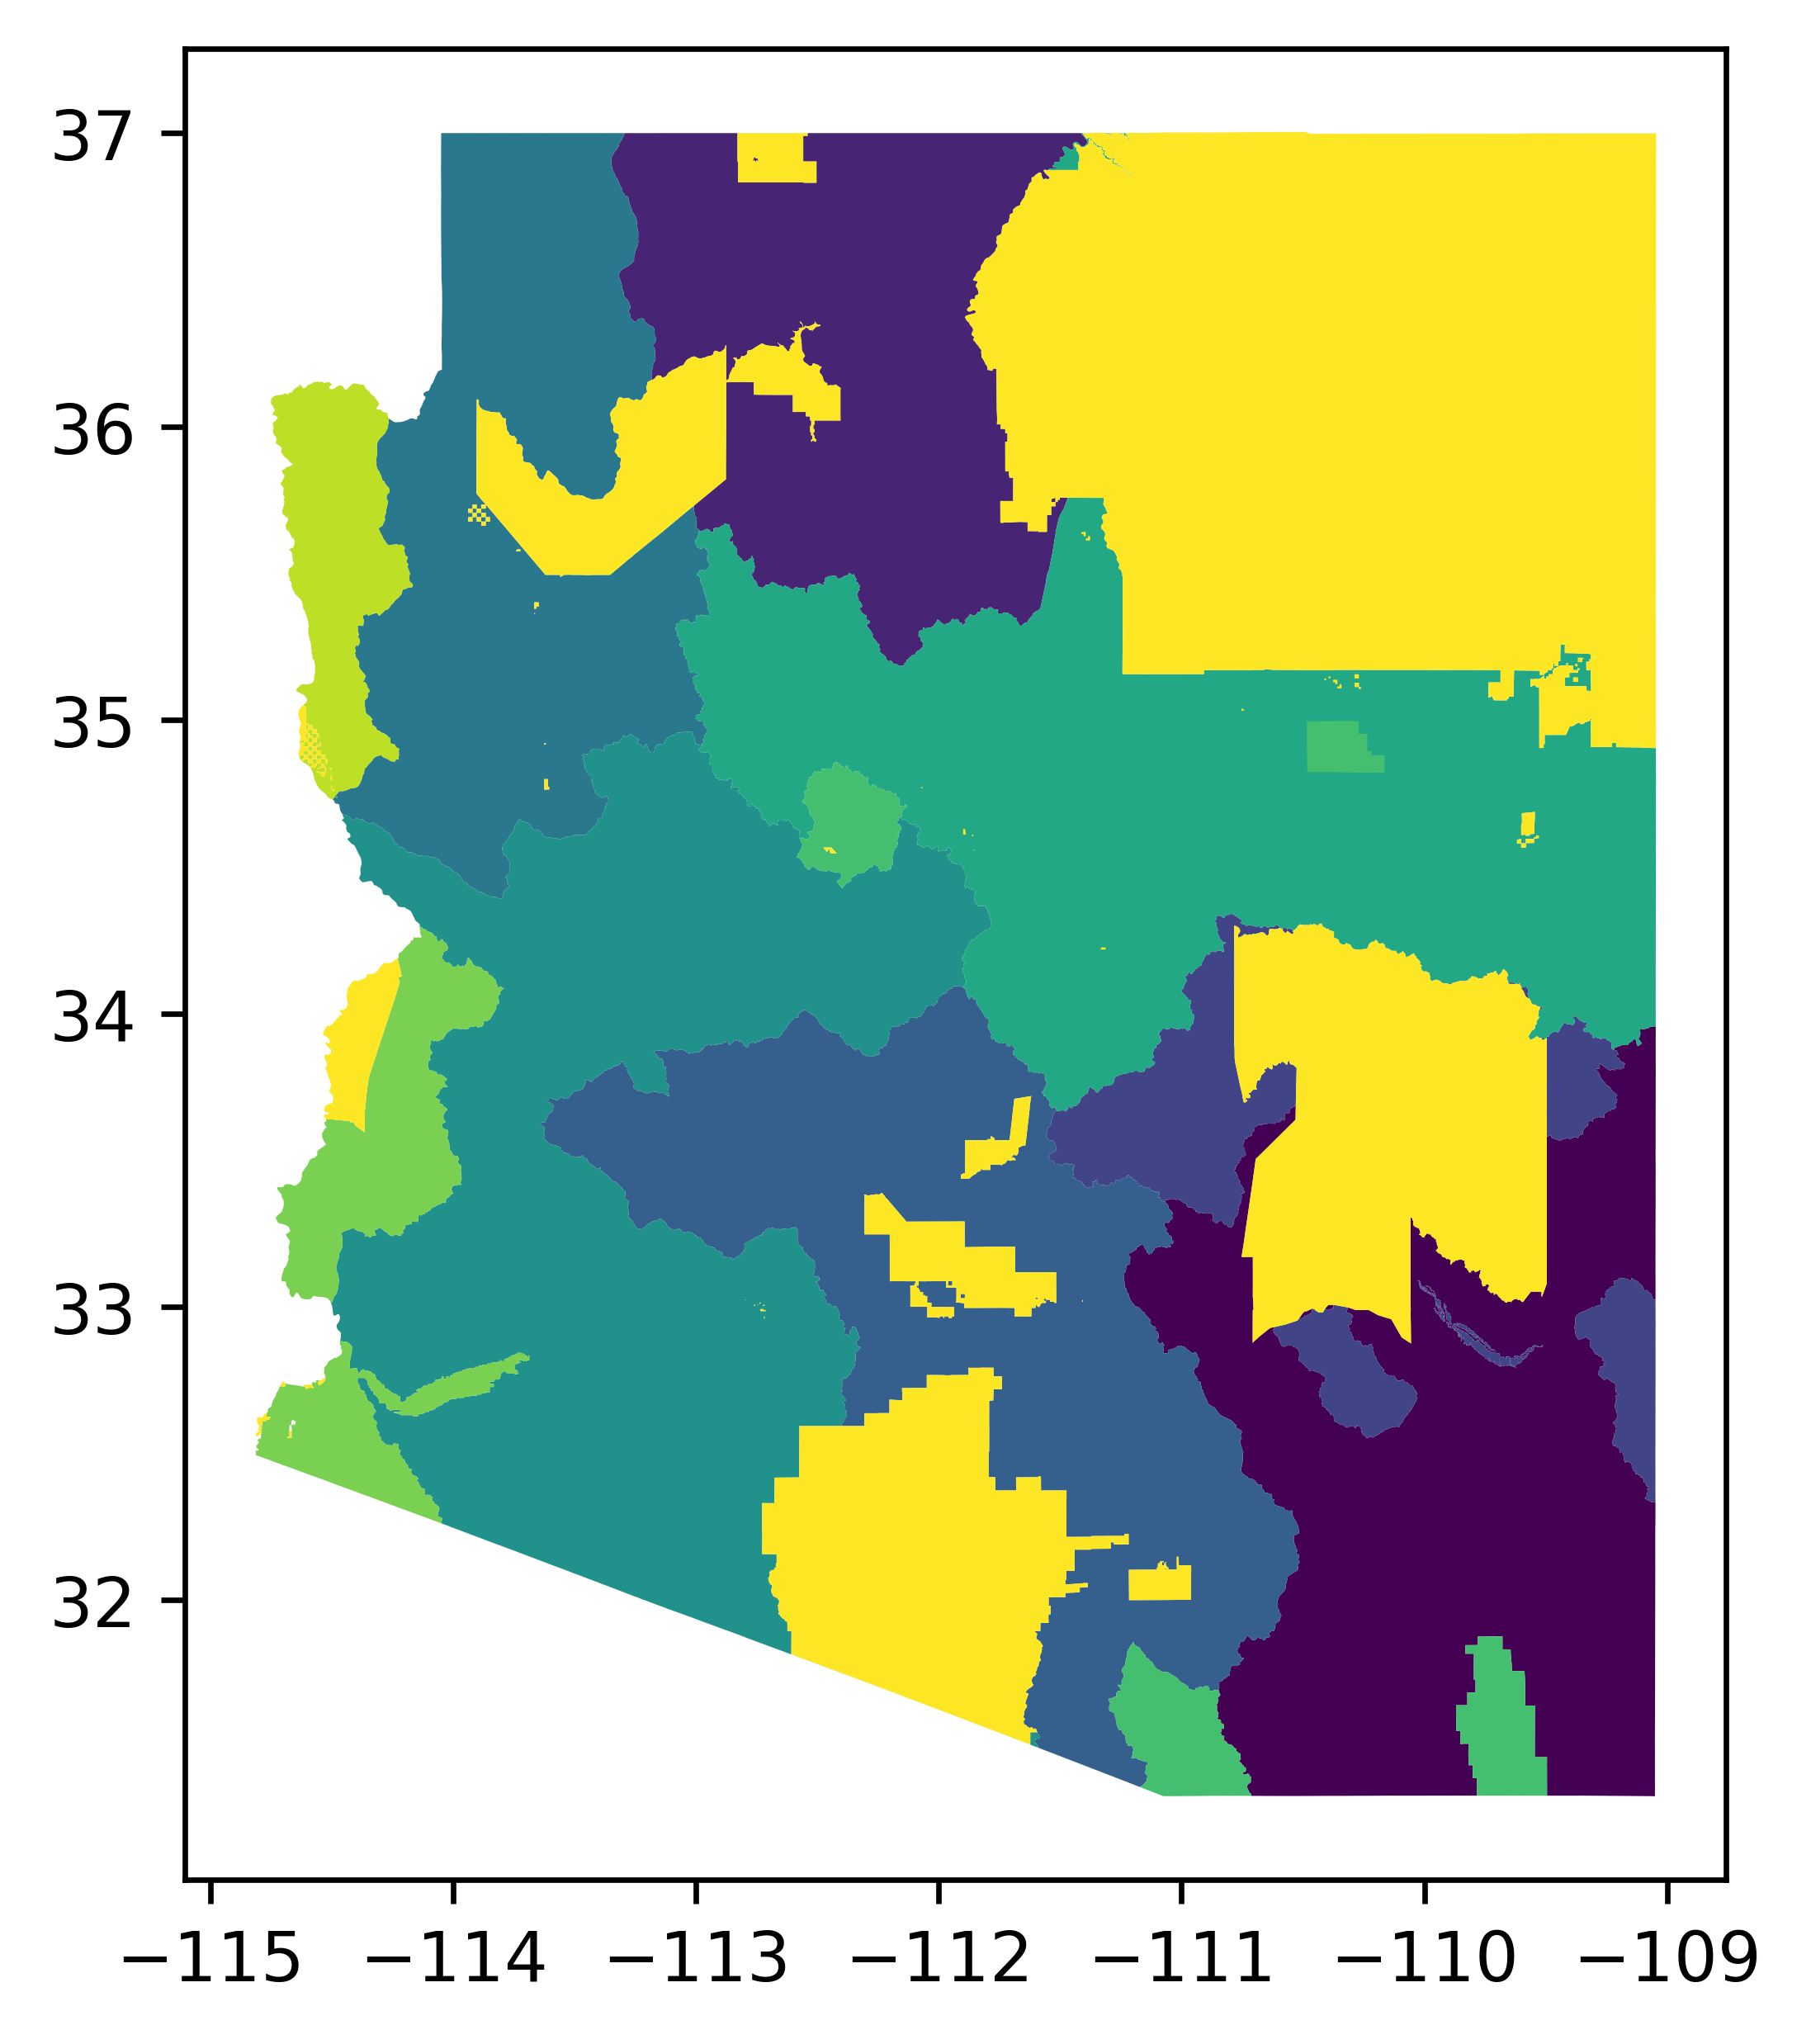

In [17]:
# %%  ==== Reading in the data ====
filename_georeg = 'georeg_reproject_fixed.shp'
filepath = os.path.join(shapepath, filename_georeg)
georeg = gp.read_file(filepath)
georeg.plot(cmap='viridis')

georeg['GEOREGI_NU'] = georeg['GEOREGI_NU'].astype('int64')
georeg.info()

# Read in the annual time series database
filename_ts = 'Wells55_GWSI_WLTS_DB_annual.csv'
filepath = os.path.join(datapath, filename_ts)
print(filepath)
annual_db = pd.read_csv(filepath, header=1, index_col=0)

annual_db.index.astype('int64')
annual_db2 = annual_db.reset_index(inplace=True)
annual_db2 = annual_db.rename(columns = {'year':'Combo_ID'})
annual_db2.head()

# For regulation
filepath = datapath+'Waterlevels_Regulation.csv'
cat_wl2_reg = pd.read_csv(filepath, index_col=0)
cat_wl2_reg.head()

# For Access to SW
filepath = datapath+'Waterlevels_AccesstoSW.csv'
cat_wl2_SW = pd.read_csv(filepath, index_col=0)
cat_wl2_SW.head()

# For georegion number
filepath = datapath+'Waterlevels_georegions.csv'
cat_wl2_georeg = pd.read_csv(filepath, index_col=0)

# Read in the drought indices
drought_indices = pd.read_csv(datapath+'Yearly_DroughtIndices.csv')
drought_indices = drought_indices.set_index('In_year')
drought_indices

In [6]:
# %% Creating colors
c_1 = '#8d5a99' # Reservation
c_2 = "#d7191c" # Regulated with CAP (Water Category Color)
c_3 = '#e77a47' # Regulated without CAP (Water Category Color)
c_4 = '#2cbe21' # Lower CO River - SW (Water Category Color)
c_5 = '#2f8c73' # Upper CO River - Mixed (Water Category Color)
c_6 = '#6db7e8' # SE - GW
c_7 = '#165782' # NW - GW (Water Category color)
c_8 = '#229ce8' # SC - GW
c_9 = '#1f78b4' # NE - GW
c_10 = '#41bf9e' # N - Mixed
c_11 = '#7adec4' # C - Mixed
drought_color = '#ffa6b8'
wet_color = '#b8d3f2'

reg_colors = [c_2,c_7]
georeg_colors = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11]
SW_colors = [c_2,c_3,c_4,c_5,c_7]

bar_watercatc = [c_2,c_3,c_4,c_5,c_7]


# Color blind palette
# https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
blind =["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# Matching new map

cap = '#C6652B'
# noCAP = '#EDE461' # This is one from the map
noCAP = '#CCC339' # This color but darker for lines
GWdom = '#3B76AF'
mixed = '#6EB2E4'
swdom = '#469B76'

## Analysis
Wanting to look at 
1) Maximum Drawdown compared to the trend 
2) Anomalies 
3) Recovery

Decided from the drought indices analysis that the cutoff value is -3 for severe droughts


In [7]:
# %% Drought dictionary
DROUGHT_YEARS = {1:[1989,1990]
        ,2:[1996]
        ,3:[2002,2003]
        ,4:[2006,2007]
        ,5:[2012,2013,2014]
        ,6:[2018]}

print(DROUGHT_YEARS)

{1: [1989, 1990], 2: [1996], 3: [2002, 2003], 4: [2006, 2007], 5: [2012, 2013, 2014], 6: [2018]}


In [24]:
#%% Pre-drought
PREDROUGHT_YEARS = {1:[1988]
        ,2:[1995]
        ,3:[2001]
        ,4:[2005]
        ,5:[2011]
        ,6:[2017]}

print(PREDROUGHT_YEARS)

{1: [1988], 2: [1995], 3: [2001], 4: [2005], 5: [2011], 6: [2017]}


In [9]:
#%% Print the average PDSI and PHDI values

ds = drought_indices.copy()
columns = ds.columns
column_list = ds.columns.tolist()

ds['Status'] = 'Normal-Wet'
# wlanalysis_period

for x,y in DROUGHT_YEARS.items():
        ds.loc[y, 'Status'] = 'Drought '+str(x)


pdsi_avg = ds.groupby(['Status']).mean()
pdsi_avg

,PDSI,PHDI
Status,,
Drought 1,-2.281250,-2.974167
Drought 2,-4.137500,-4.137500
Drought 3,-4.109167,-4.109167
Drought 4,-3.658750,-3.658750
Drought 5,-3.164722,-3.164722
Drought 6,-3.342500,-4.258333
Normal-Wet,0.202024,0.335333


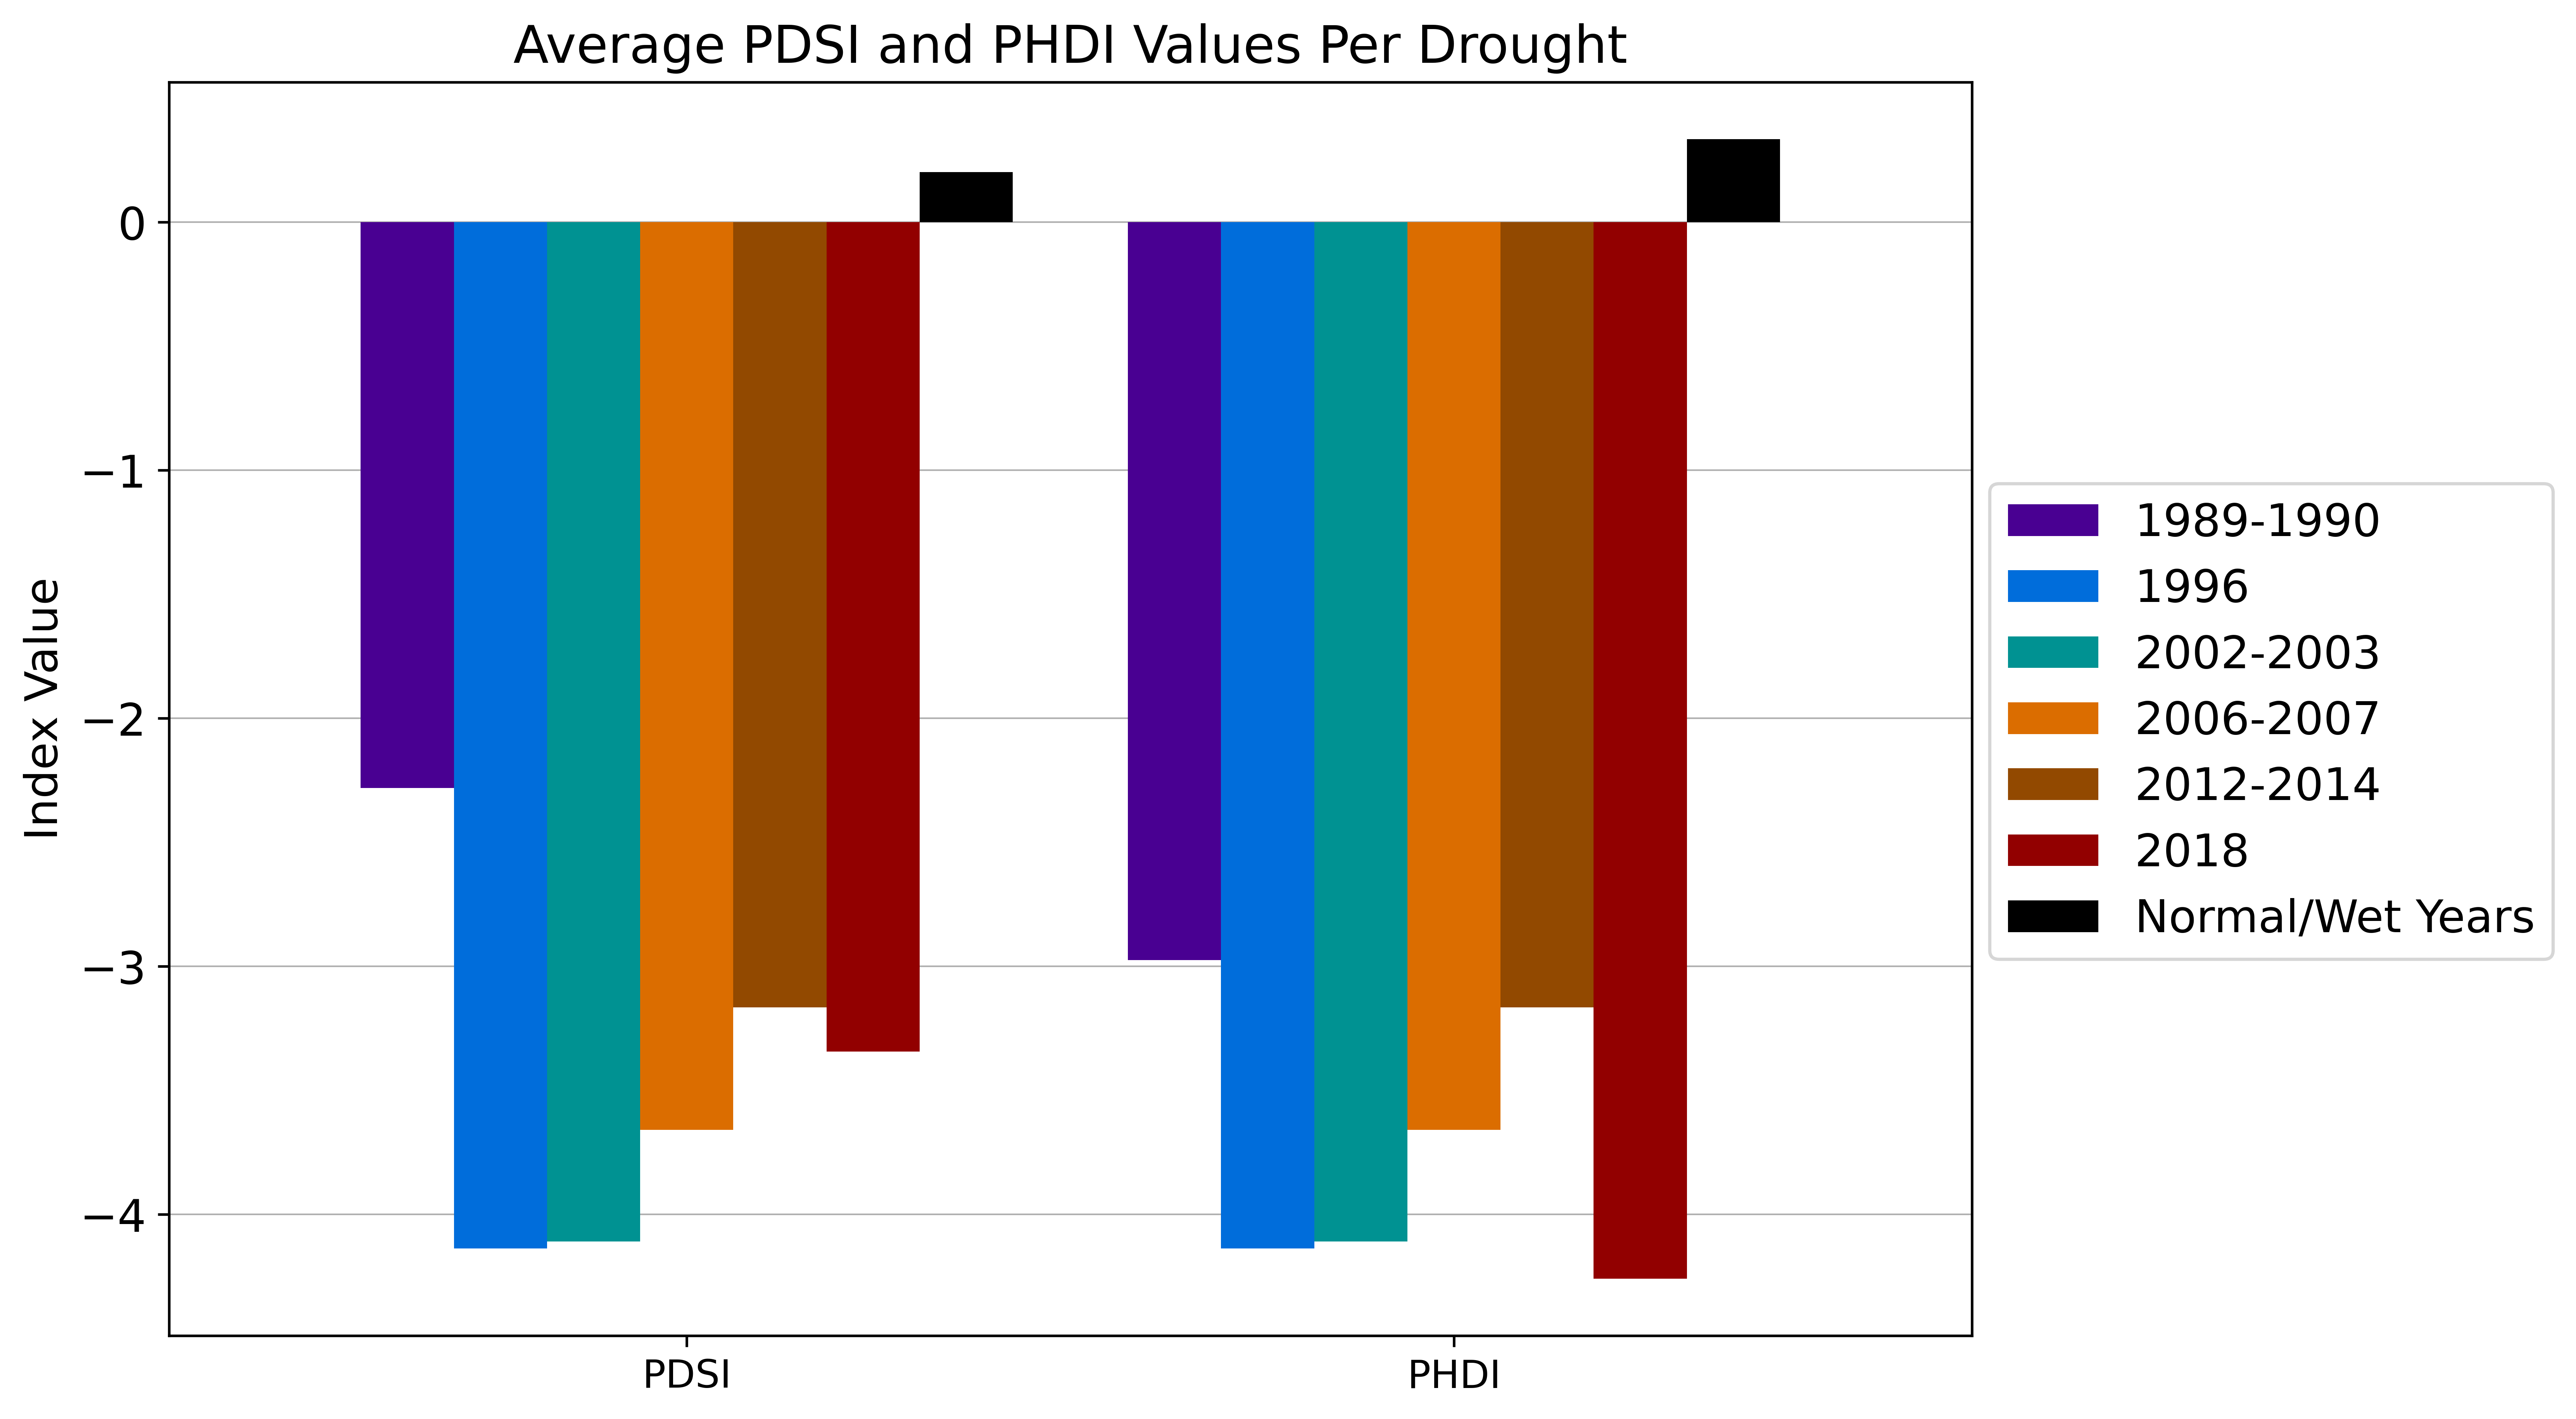

In [10]:
name = 'Average PDSI and PHDI Values Per Drought'

yearlabels = ["1989-1990"
                ,'1996'
                ,'2002-2003'
                ,'2006-2007'
                ,'2012-2014'
                ,'2018'
                ,'Normal/Wet Years']

pdsi_avg.index = yearlabels
pdsi_avg = pdsi_avg.transpose()
# del ds['Normal/Wet Years']
pdsi_avg
#%%
group_colors = [blind[5],blind[6],blind[2]
                ,blind[12],blind[11],blind[10]
                ,blind[0] #black
                ]

horlabel = 'Index Value'
fsize = 14

plt.rcParams["figure.dpi"] = 600
pdsi_avg.plot(figsize = (10,7),
        kind='bar',
        stacked=False,
        # title=name,
        color = group_colors,
        zorder = 2,
        width = 0.85,
        fontsize = fsize
        )
plt.title(name, fontsize = (fsize+2))
# plt.ylim([0,400])
plt.ylabel(horlabel, fontsize = fsize)
plt.xticks(rotation=0, fontsize = fsize-2)
plt.grid(axis='y', linewidth=0.5, zorder=0)
plt.legend(loc=[1.01,0.3],fontsize = fsize)

# plt.savefig(outputpath+name+'_groupedchart', bbox_inches = 'tight')

In [18]:
# %% Figure out which water level database you want
cat_wl2 = cat_wl2_reg.copy() 
# cat_wl2 = cat_wl2_SW.copy()
# cat_wl2 = cat_wl2_georeg.copy()

# cat_wl2 = wdc1_reg.copy()
# cat_wl2 = wdc2_reg.copy()
# cat_wl2 = wdc3_reg.copy()
# cat_wl2 = wdc1_SW.copy()
# cat_wl2 = wdc2_SW.copy()
# cat_wl2 = wdc3_SW.copy()

# Water Analysis period
wlanalysis_period = cat_wl2[cat_wl2.index>=1975]
# wlanalysis_period["UGW"]=wlanalysis_period['GW']
# del wlanalysis_period['GW']
# wlanalysis_period

In [19]:
# Anomaly's
ds = wlanalysis_period
columns = ds.columns
column_list = ds.columns.tolist()

dtw_anomalys = pd.DataFrame()
for i in column_list:
        dtw_anomalys[i] = wlanalysis_period[i] - wlanalysis_period[i].mean()

dtw_anomalys.head()

,R,U
index,,
1975,-19.786224,-22.726905
1976,-26.365098,-40.960395
1977,-21.278431,-45.358392
1978,-24.211864,-43.540350
1979,-30.815398,-51.541020


In [28]:
# %% Max drawdown
ds = wlanalysis_period.copy()
columns = ds.columns
column_list = ds.columns.tolist()

ds['Status'] = 'Normal-Wet'
# wlanalysis_period

for x,y in DROUGHT_YEARS.items():
        ds.loc[y, 'Status'] = 'Drought '+str(x)


drawd_max = ds.groupby(['Status']).max()
drawd_max

,R,U
Status,,
Drought 1,180.712773,159.418976
Drought 2,164.610175,151.940624
Drought 3,238.270432,209.671952
Drought 4,224.220432,217.820875
Drought 5,227.468807,228.765211
Drought 6,238.833255,235.502765
Normal-Wet,230.834913,232.780097


In [29]:
PREDROUGHT_YEARS

{1: [1988], 2: [1995], 3: [2001], 4: [2005], 5: [2011], 6: [2017]}

This is for calculating against the average for Normal-Wet periods

In [39]:
# Predrought values
ds = wlanalysis_period.copy()
columns = ds.columns
column_list = ds.columns.tolist()

ds['Status'] = 'Normal-Wet'

for x,y in PREDROUGHT_YEARS.items():
        ds.loc[y, 'Status'] = 'Drought '+str(x)

ds
predrought = ds.groupby(['Status']).mean()
predrought

,R,U
Status,,
Drought 1,196.681660,177.591402
Drought 2,160.480246,155.075218
Drought 3,226.414098,203.431008
Drought 4,225.402616,203.971972
Drought 5,228.530210,206.329765
Drought 6,230.834913,208.818241
Normal-Wet,199.189759,180.685858


Now for calculating against the slope

In [67]:
# Predrought values
import pandas as pd
ds = wlanalysis_period.copy()
columns = ds.columns
column_list = ds.columns.tolist()

labels = ['R','U']

columns = ds.columns
column_list = ds.columns.tolist()
stats = pd.DataFrame()
for i in column_list:
        df = ds[i]
        # df = f[i].pct_change()
        #print(df)
        y=np.array(df.values, dtype=float)
        x=np.array(pd.to_datetime(df).index.values, dtype=float)
        slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
        stats = stats._append({'slope': slope,
                               'int':intercept
                        },
                        ignore_index=True)


stats.index = labels
stats1 = stats.transpose()
stats1

,R,U
slope,1.306633,1.986517
int,-2409.217735,-3785.836173


In [ ]:
predrought = ds.groupby(['Status']).mean()
predrought

In [65]:
pre_d = 

,R,U
index,,
1975,180.994953,159.504658
1976,174.416079,141.271168
1977,179.502746,136.873172
1978,176.569313,138.691213
1979,169.965778,130.690543
1980,171.947298,145.178593
1981,182.343093,149.781837
1982,192.491747,159.604408
1983,193.812877,164.875290


In [50]:
# %% Drawdown
drawdown = drawd_max - predrought
# del drawdown['Status']
drawdown

,R,U
Status,,
Drought 1,-15.968887,-18.172426
Drought 2,4.129929,-3.134594
Drought 3,11.856334,6.240944
Drought 4,-1.182184,13.848902
Drought 5,-1.061402,22.435446
Drought 6,7.998343,26.684524
Normal-Wet,31.645153,52.094239


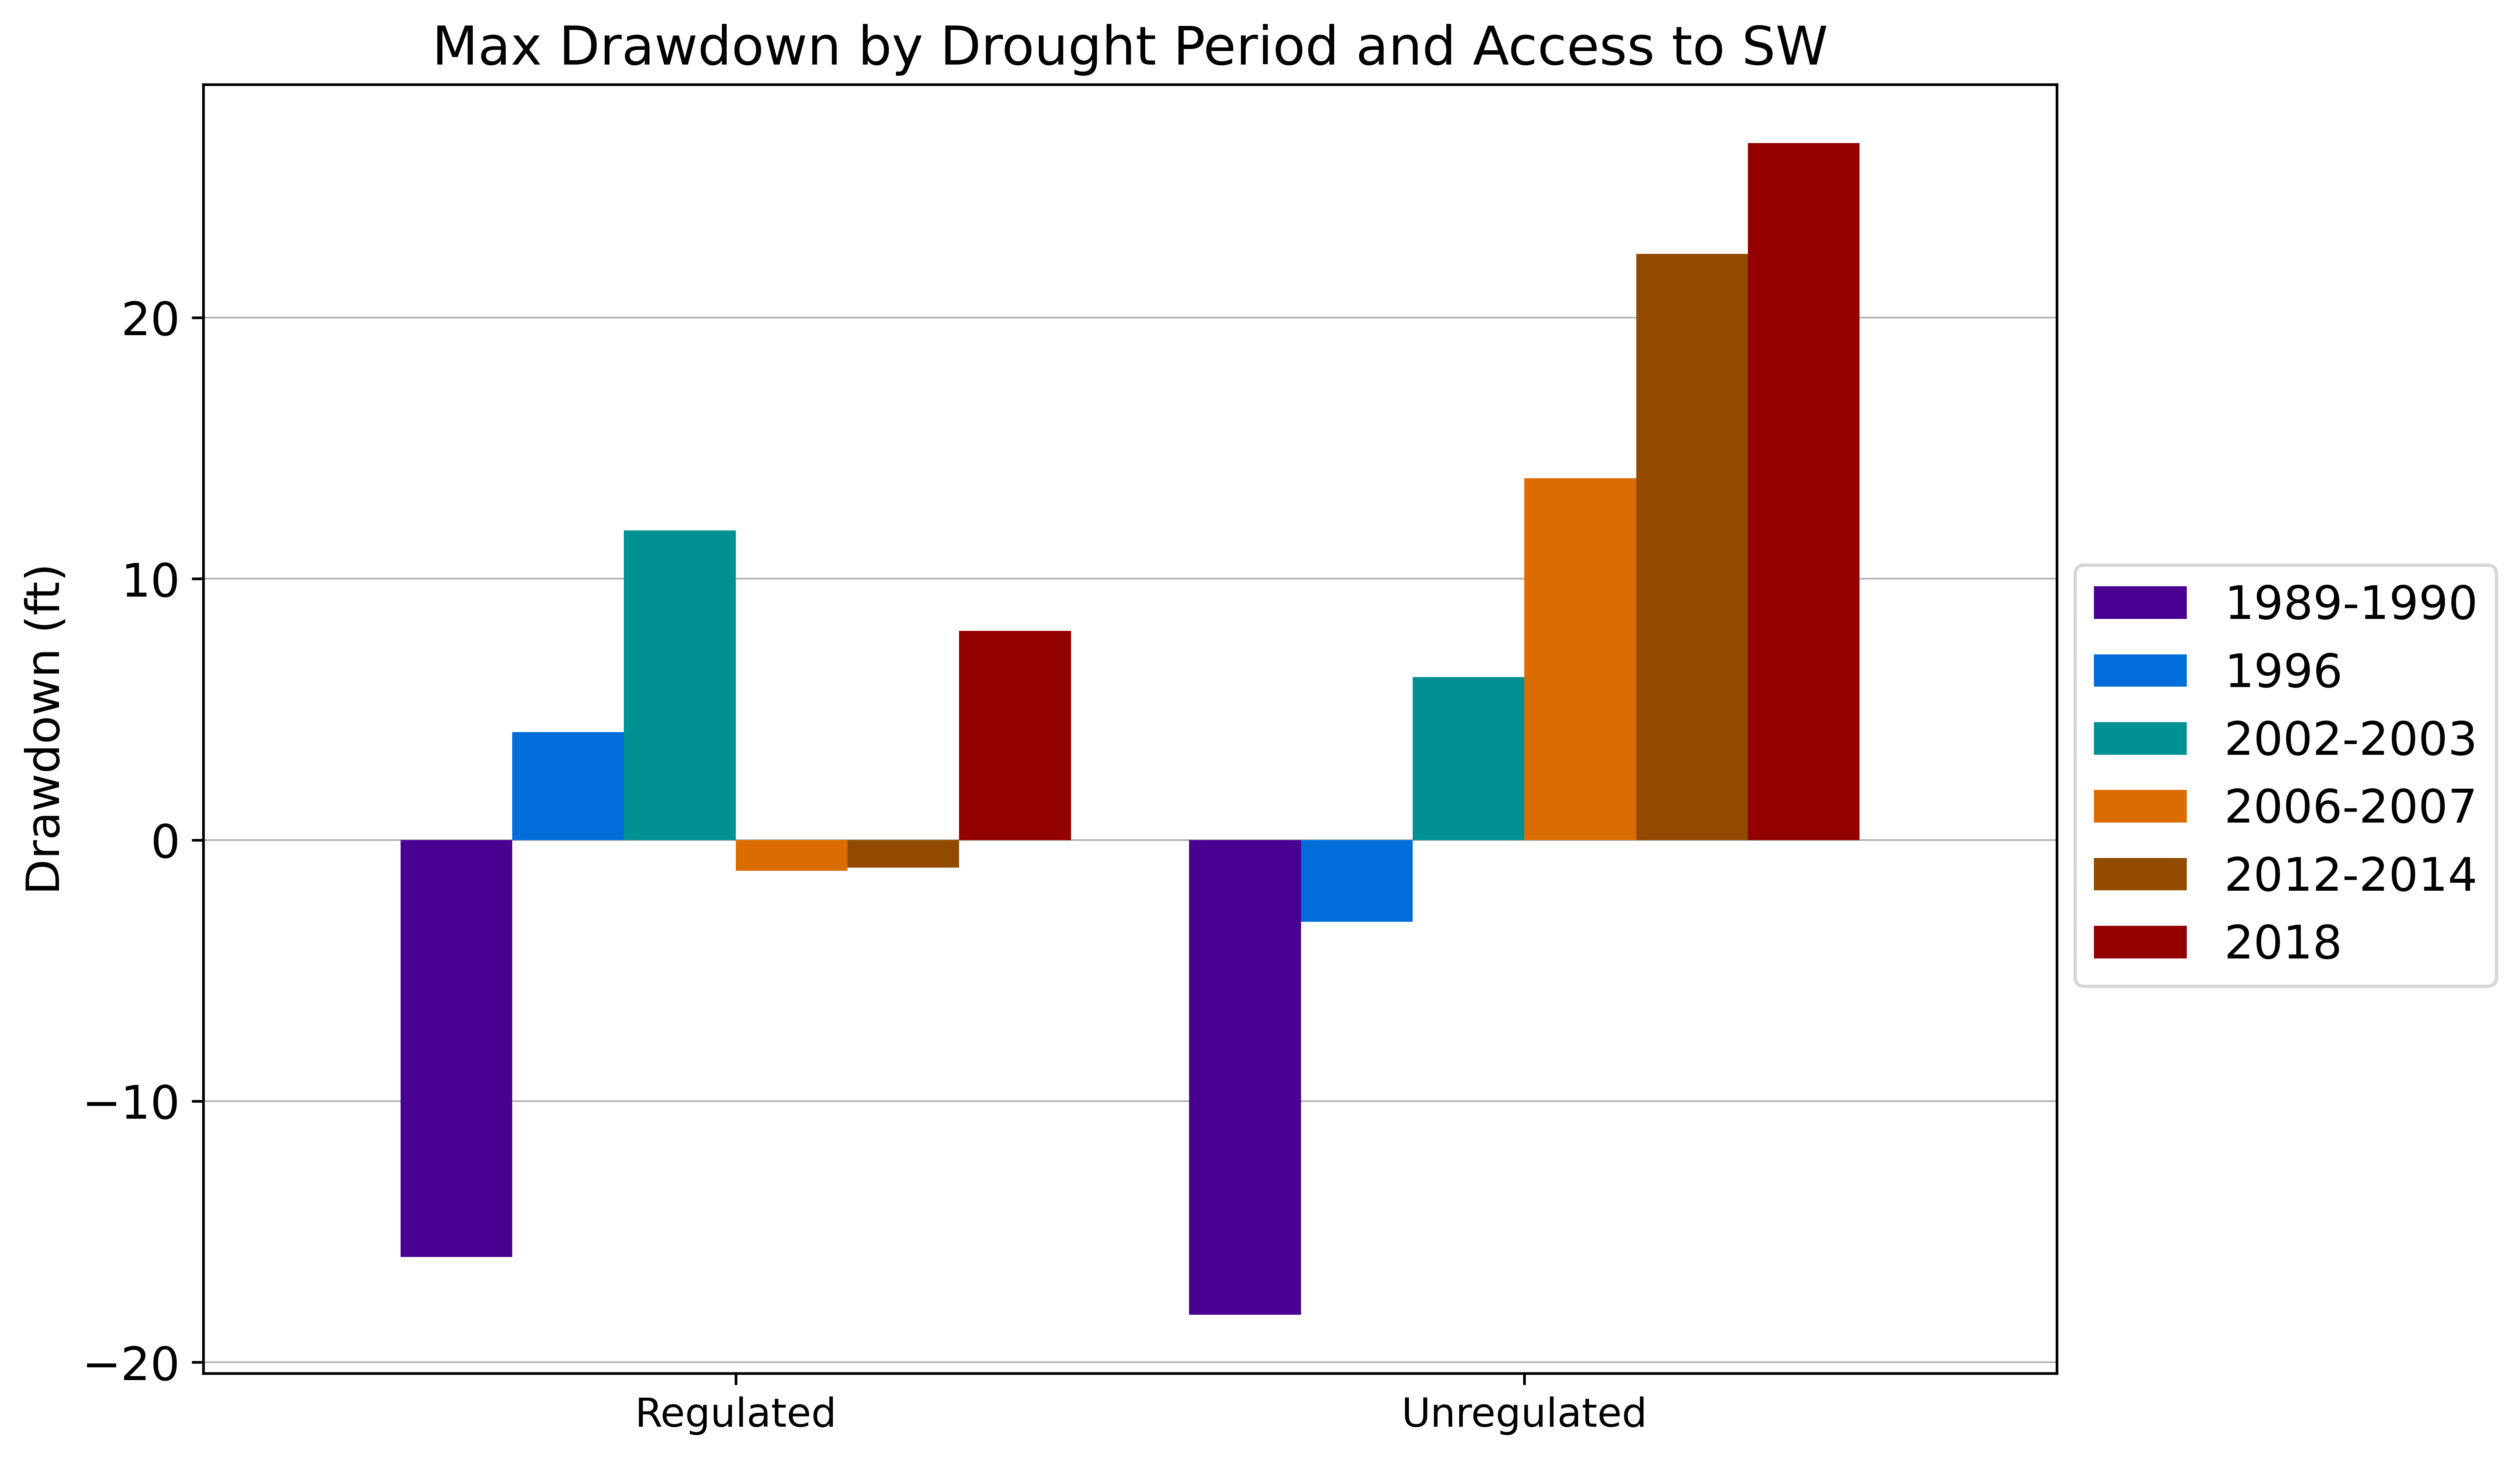

In [51]:
#%% Grouped Bar chart for drawdown (ft)
# name = 'Max Drawdown by Drought Period and Groundwater Regulation'
name = 'Max Drawdown by Drought Period and Access to SW'

yearlabels = ["1989-1990",'1996','2002-2003','2006-2007','2012-2014','2018','Normal/Wet Years']
# betterlabels = ['CAP','Regulated \n Groundwater','Surface \n Water','Unregulated \n Groundwater','Mixed \n GW/SW'] 
betterlabels = ['Regulated','Unregulated']

drawdown.index = yearlabels
drawdown = drawdown.transpose()
drawdown
drawdown.index = betterlabels
del drawdown['Normal/Wet Years']
drawdown


# group_colors = ['lightsalmon','tomato','orangered','r','brown','indianred','steelblue']

group_colors = [blind[5],blind[6],blind[2]
                ,blind[12],blind[11],blind[10]
                ,blind[0] #black
                ]

horlabel = 'Drawdown (ft)'
fsize = 14

plt.rcParams["figure.dpi"] = 600
drawdown.plot(figsize = (10,7),
        kind='bar',
        stacked=False,
        # title=name,
        color = group_colors,
        zorder = 2,
        width = 0.85,
        fontsize = fsize
        )
plt.title(name, fontsize = (fsize+2))
# plt.ylim([0,400])
plt.ylabel(horlabel, fontsize = fsize)
plt.xticks(rotation=0, fontsize = fsize-2)
plt.grid(axis='y', linewidth=0.5, zorder=0)
plt.legend(loc=[1.01,0.3],fontsize = fsize)
# plt.set_dpi(600)

# plt.savefig(outputpath+name+'_GWREG_groupedchart', bbox_inches = 'tight')
# plt.savefig(outputpath+name+'_anomalies_SWAccess_groupedchart', bbox_inches = 'tight')